The task is to build a Convolutional Neural Network model for text classification in Tensorflow.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
# download BBC text classification dataset
# original dataset on Kaggle: https://www.kaggle.com/datasets/shivamkushwaha/bbc-full-text-document-classification)
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

File ‘bbc_text_cls.csv’ already there; not retrieving.



In [3]:
# save the dataset in Pandas dataframe
df = pd.read_csv('bbc_text_cls.csv')

In [4]:
# assign integers to labels
df['targets'] = df['labels'].astype('category').cat.codes

In [5]:
# number of classes
K = df['targets'].nunique()

In [6]:
# make train and test sets
df_train, df_test = train_test_split(df, test_size=0.3)

In [7]:
# convert texts to sequences
MAX_VOCAB_SIZE = 2000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train['text'])
sequences_train = tokenizer.texts_to_sequences(df_train['text'])
sequences_test = tokenizer.texts_to_sequences(df_test['text'])

In [8]:
# make a dictionary of words to indices
word2idx = tokenizer.word_index
V = len(word2idx)
print(f"Found {V} unique tokens.")

Found 27858 unique tokens.


In [9]:
# pad train and test sets
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

Shape of data train tensor: (1557, 3490)


In [10]:
T = data_train.shape[1]

In [11]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (668, 3490)


In [12]:
D = 50

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(K)(x)

model = Model(i, x)

In [13]:
model.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])

print('Training model...')

r = model.fit(data_train, df_train['targets'], epochs=50, validation_data=(data_test, df_test['targets']))

Training model...
Epoch 1/50
49/49 [==============================] - 4s 68ms/step - loss: 1.5634 - accuracy: 0.3847 - val_loss: 1.4801 - val_accuracy: 0.5838
Epoch 2/50
49/49 [==============================] - 3s 60ms/step - loss: 1.3363 - accuracy: 0.7579 - val_loss: 1.1739 - val_accuracy: 0.8189
Epoch 3/50
49/49 [==============================] - 3s 60ms/step - loss: 0.9071 - accuracy: 0.8760 - val_loss: 0.7168 - val_accuracy: 0.9072
Epoch 4/50
49/49 [==============================] - 3s 61ms/step - loss: 0.4885 - accuracy: 0.9306 - val_loss: 0.4142 - val_accuracy: 0.9296
Epoch 5/50
49/49 [==============================] - 3s 61ms/step - loss: 0.2710 - accuracy: 0.9557 - val_loss: 0.2804 - val_accuracy: 0.9446
Epoch 6/50
49/49 [==============================] - 3s 66ms/step - loss: 0.1694 - accuracy: 0.9730 - val_loss: 0.2217 - val_accuracy: 0.9491
Epoch 7/50
49/49 [==============================] - 3s 57ms/step - loss: 0.1156 - accuracy: 0.9827 - val_loss: 0.1890 - val_accuracy: 0.

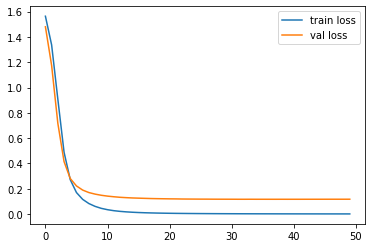

In [14]:
# loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

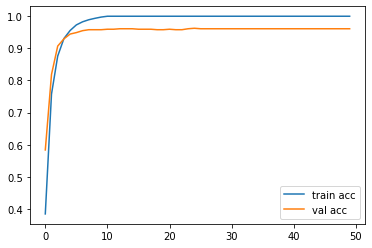

In [15]:
# accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();